# CREDIT CARD SEGMENTATION

In [1]:
import pandas as pd              
import numpy as np               

import seaborn as sns            

import matplotlib.pyplot as plt  
%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

### IMPORTING THE DATASET

In [2]:
dataset = pd.read_csv("F:\\Akash\\New folder\\Project 4\\CC_GENERAL.csv")

## DATA AUDIT

In [3]:
dataset.head()  

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
dataset.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [5]:
dataset.shape

(8950, 18)

In [6]:
dataset.info(null_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   CUST_ID                           object 
 1   BALANCE                           float64
 2   BALANCE_FREQUENCY                 float64
 3   PURCHASES                         float64
 4   ONEOFF_PURCHASES                  float64
 5   INSTALLMENTS_PURCHASES            float64
 6   CASH_ADVANCE                      float64
 7   PURCHASES_FREQUENCY               float64
 8   ONEOFF_PURCHASES_FREQUENCY        float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  float64
 10  CASH_ADVANCE_FREQUENCY            float64
 11  CASH_ADVANCE_TRX                  int64  
 12  PURCHASES_TRX                     int64  
 13  CREDIT_LIMIT                      float64
 14  PAYMENTS                          float64
 15  MINIMUM_PAYMENTS                  float64
 16  PRC_FULL_PAYMENT                  float64


C:\Users\sagar\AppData\Local\Temp\ipykernel_13708\3208362980.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  dataset.info(null_counts = False)


In [7]:
dataset.isna().sum() # prints the total number of missing values in the dataset

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# splitting continous and categorical valriables to perform some specific functions on them.
# and so have to better clarity of the data

dataset_conti_vars = dataset.loc[:, (dataset.dtypes == 'float64') | (dataset.dtypes == 'int64')]
dataset_cat_vars = dataset.loc[:, dataset.dtypes == 'object']

In [9]:
# creating a UDF to diplay a brief summary of the dataset

def continous_var_summary(x):
    return pd.Series([x.count(), x.isna().sum(), x.sum(), x.min(), x.mean(), x.median(), x.std(), x.var(), 
                      x.quantile(.01), x.quantile(.05), x.quantile(.10), x.quantile(.25), x.quantile(.50), 
                      x.quantile(.75), x.quantile(.90), x.quantile(.95), x.quantile(.99), x.max()], 
                     index = ['N', 'NMISS', 'SUM', 'MIN', 'MEAN', 'MEDIAN', 'STD', 'VAR', 'P1', 'P5', 'P10', 
                              'P25', 'P50', 'P75', 'P90', 'P95', 'P99', 'MAX'])

In [10]:
dataset_conti_vars.apply(continous_var_summary).T.round(2)

,N,NMISS,SUM,MIN,MEAN,MEDIAN,STD,VAR,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,14002049.71,0.00,1564.47,873.39,2081.53,4332774.97,0.07,8.81,23.58,128.28,873.39,2054.14,4338.56,5909.11,9338.80,19043.14
BALANCE_FREQUENCY,8950.0,0.0,7851.57,0.00,0.88,1.00,0.24,0.06,0.09,0.27,0.45,0.89,1.00,1.00,1.00,1.00,1.00,1.00
PURCHASES,8950.0,0.0,8978683.26,0.00,1003.20,361.28,2136.63,4565208.19,0.00,0.00,0.00,39.64,361.28,1110.13,2542.62,3998.62,8977.29,49039.57
ONEOFF_PURCHASES,8950.0,0.0,5302314.47,0.00,592.44,38.00,1659.89,2755227.90,0.00,0.00,0.00,0.00,38.00,577.40,1600.10,2671.09,6689.90,40761.25
INSTALLMENTS_PURCHASES,8950.0,0.0,3679055.42,0.00,411.07,89.00,904.34,817827.43,0.00,0.00,0.00,0.00,89.00,468.64,1140.07,1750.09,3886.24,22500.00
CASH_ADVANCE,8950.0,0.0,8760896.46,0.00,978.87,0.00,2097.16,4398096.33,0.00,0.00,0.00,0.00,0.00,1113.82,3065.53,4647.17,9588.16,47137.21
PURCHASES_FREQUENCY,8950.0,0.0,4388.64,0.00,0.49,0.50,0.40,0.16,0.00,0.00,0.00,0.08,0.50,0.92,1.00,1.00,1.00,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1812.00,0.00,0.20,0.08,0.30,0.09,0.00,0.00,0.00,0.00,0.08,0.30,0.75,1.00,1.00,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3261.71,0.00,0.36,0.17,0.40,0.16,0.00,0.00,0.00,0.00,0.17,0.75,1.00,1.00,1.00,1.00
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1209.54,0.00,0.14,0.00,0.20,0.04,0.00,0.00,0.00,0.00,0.00,0.22,0.42,0.58,0.83,1.50


## DATA PREPERATION

### OUTLIERS TREATMENT

In [11]:
# Clipping outliers with P5 and P95
dataset_conti_vars = dataset_conti_vars.apply(lambda x: x.clip(lower = x.dropna().quantile(.05), upper = x.quantile(.95)))

In [12]:
dataset_conti_vars.apply(continous_var_summary).T.round(2)

,N,NMISS,SUM,MIN,MEAN,MEDIAN,STD,VAR,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,12998976.36,8.81,1452.40,873.39,1688.93,2852482.16,8.81,8.82,23.58,128.28,873.39,2054.14,4338.56,5907.79,5909.11,5909.11
BALANCE_FREQUENCY,8950.0,0.0,7905.11,0.27,0.88,1.00,0.22,0.05,0.27,0.27,0.45,0.89,1.00,1.00,1.00,1.00,1.00,1.00
PURCHASES,8950.0,0.0,7373574.05,0.00,823.86,361.28,1099.81,1209588.81,0.00,0.00,0.00,39.64,361.28,1110.13,2542.62,3997.90,3998.62,3998.62
ONEOFF_PURCHASES,8950.0,0.0,4009141.13,0.00,447.95,38.00,746.13,556715.28,0.00,0.00,0.00,0.00,38.00,577.40,1600.10,2668.95,2671.09,2671.09
INSTALLMENTS_PURCHASES,8950.0,0.0,3010207.56,0.00,336.34,89.00,497.83,247834.88,0.00,0.00,0.00,0.00,89.00,468.64,1140.07,1748.44,1750.09,1750.09
CASH_ADVANCE,8950.0,0.0,7313592.25,0.00,817.16,0.00,1349.18,1820282.04,0.00,0.00,0.00,0.00,0.00,1113.82,3065.53,4643.58,4647.17,4647.17
PURCHASES_FREQUENCY,8950.0,0.0,4388.64,0.00,0.49,0.50,0.40,0.16,0.00,0.00,0.00,0.08,0.50,0.92,1.00,1.00,1.00,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1812.00,0.00,0.20,0.08,0.30,0.09,0.00,0.00,0.00,0.00,0.08,0.30,0.75,1.00,1.00,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3261.71,0.00,0.36,0.17,0.40,0.16,0.00,0.00,0.00,0.00,0.17,0.75,1.00,1.00,1.00,1.00
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1142.35,0.00,0.13,0.00,0.18,0.03,0.00,0.00,0.00,0.00,0.00,0.22,0.42,0.58,0.58,0.58


### MISSING VALUE TREATMENT

In [13]:
# Creating a UDF to treat missing values

def missing_imputation(x, stats = 'mean'):
    if (x.dtype == 'float64') | (x.dtype == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median)
    else:
        x = x.fillna(x.mode())
    return x

In [14]:
# Imputing missing values
# Continous values with the mean and categorical values with the mode 

dataset_conti_vars = dataset_conti_vars.apply(missing_imputation)

In [15]:
dataset_conti_vars.apply(continous_var_summary).T.round(2) 

,N,NMISS,SUM,MIN,MEAN,MEDIAN,STD,VAR,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,12998976.36,8.81,1452.40,873.39,1688.93,2852482.16,8.81,8.82,23.58,128.28,873.39,2054.14,4338.56,5907.79,5909.11,5909.11
BALANCE_FREQUENCY,8950.0,0.0,7905.11,0.27,0.88,1.00,0.22,0.05,0.27,0.27,0.45,0.89,1.00,1.00,1.00,1.00,1.00,1.00
PURCHASES,8950.0,0.0,7373574.05,0.00,823.86,361.28,1099.81,1209588.81,0.00,0.00,0.00,39.64,361.28,1110.13,2542.62,3997.90,3998.62,3998.62
ONEOFF_PURCHASES,8950.0,0.0,4009141.13,0.00,447.95,38.00,746.13,556715.28,0.00,0.00,0.00,0.00,38.00,577.40,1600.10,2668.95,2671.09,2671.09
INSTALLMENTS_PURCHASES,8950.0,0.0,3010207.56,0.00,336.34,89.00,497.83,247834.88,0.00,0.00,0.00,0.00,89.00,468.64,1140.07,1748.44,1750.09,1750.09
CASH_ADVANCE,8950.0,0.0,7313592.25,0.00,817.16,0.00,1349.18,1820282.04,0.00,0.00,0.00,0.00,0.00,1113.82,3065.53,4643.58,4647.17,4647.17
PURCHASES_FREQUENCY,8950.0,0.0,4388.64,0.00,0.49,0.50,0.40,0.16,0.00,0.00,0.00,0.08,0.50,0.92,1.00,1.00,1.00,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1812.00,0.00,0.20,0.08,0.30,0.09,0.00,0.00,0.00,0.00,0.08,0.30,0.75,1.00,1.00,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3261.71,0.00,0.36,0.17,0.40,0.16,0.00,0.00,0.00,0.00,0.17,0.75,1.00,1.00,1.00,1.00
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1142.35,0.00,0.13,0.00,0.18,0.03,0.00,0.00,0.00,0.00,0.00,0.22,0.42,0.58,0.58,0.58


In [16]:
# Hence, concating the continous and categorical variables to get one final consolidated table

credit = dataset_conti_vars.copy()

In [17]:
# 'CustID' varibale doesn't play an important role in model building.
# Hence dropping that variable.

In [18]:
credit.head() 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,89.988924,643.387510,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


## DRIVING NEW KEY PERFORMANCE INDICATORS ( KPIs )

#### Monthly average purchase and cash advance amount

In [19]:
# Calculating Monthly average purchase by dividing 
# 'Total purchase amount spent during last 12 months' by 'Number of months as a customer'

credit['monthly_avg_purchase'] = credit['PURCHASES'] / credit['TENURE']

In [20]:
# Calculating monthly 'cash advance amount' by dividing
# 'Total cash-advance amount' by 'Number of months as a customer'

credit['monthly_cash_advance'] = credit['CASH_ADVANCE'] / credit['TENURE']

In [21]:
credit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_avg_purchase,monthly_cash_advance
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,7.950000,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.000000,387.264093
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,64.430833,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,89.988924,643.387510,0.000000,12.0,124.916667,17.149001
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.333333,0.000000


#### Purchases by type (one-off, installments)

In [22]:
credit.iloc[:, [4, 5]].head()

,INSTALLMENTS_PURCHASES,CASH_ADVANCE
0,95.4,0.000000
1,0.0,4647.169122
2,0.0,0.000000
3,0.0,205.788017
4,0.0,0.000000


In [23]:
# Creating a UDF to create a new KPI 'Purchase_by_type'

def purchase(credit):
    if (credit['ONEOFF_PURCHASES'] == 0) & (credit['INSTALLMENTS_PURCHASES'] == 0):
        return 'None'
    elif (credit['ONEOFF_PURCHASES'] > 0) & (credit['INSTALLMENTS_PURCHASES'] == 0):
        return 'OneOff_Purchases'
    elif (credit['ONEOFF_PURCHASES'] == 0) & (credit['INSTALLMENTS_PURCHASES'] > 0):
        return 'Installments_Purchases'
    elif (credit['ONEOFF_PURCHASES'] > 0) & (credit['INSTALLMENTS_PURCHASES'] > 0):
        return 'Both_OneOff_Installments_Purchases'

In [24]:
credit['Purchase_by_type'] = credit.apply(purchase, axis = 1)
credit['Purchase_by_type'].value_counts()

Both_OneOff_Installments_Purchases    2774
Installments_Purchases                2260
None                                  2042
OneOff_Purchases                      1874
Name: Purchase_by_type, dtype: int64

#### Average amount per purchase and cash advance transaction

In [25]:
credit.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'monthly_avg_purchase', 'monthly_cash_advance',
       'Purchase_by_type'],
      dtype='object')

In [26]:
credit.loc[:, ['PURCHASES_TRX', 'CASH_ADVANCE_TRX']].head()

,PURCHASES_TRX,CASH_ADVANCE_TRX
0,2.0,0.0
1,0.0,4.0
2,12.0,0.0
3,1.0,1.0
4,1.0,0.0


#### Limit usage (balance to credit limit ratio)

In [27]:
# limit usage
credit['limit_usage'] = credit.apply(lambda x: x['BALANCE'] / x['CREDIT_LIMIT'], axis=1)
credit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_avg_purchase,monthly_cash_advance,Purchase_by_type,limit_usage
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,2.0,1000.0,201.802084,139.509787,0.000000,12.0,7.950000,0.000000,Installments_Purchases,0.040901
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.000000,387.264093,None,0.457495
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,12.0,7500.0,622.066742,627.284787,0.000000,12.0,64.430833,0.000000,OneOff_Purchases,0.332687
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,1.0,7500.0,89.988924,643.387510,0.000000,12.0,124.916667,17.149001,OneOff_Purchases,0.222223
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.333333,0.000000,OneOff_Purchases,0.681429


#### Payments to minimum payments ratio

In [28]:
# payment to minimum payment ratio
credit['payment_minpay'] = credit.apply(lambda x: x['PAYMENTS'] / x['MINIMUM_PAYMENTS'], axis=1)
credit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_avg_purchase,monthly_cash_advance,Purchase_by_type,limit_usage,payment_minpay
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12.0,7.950000,0.000000,Installments_Purchases,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12.0,0.000000,387.264093,None,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12.0,64.430833,0.000000,OneOff_Purchases,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,89.988924,643.387510,0.000000,12.0,124.916667,17.149001,OneOff_Purchases,0.222223,0.139867
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12.0,1.333333,0.000000,OneOff_Purchases,0.681429,2.771075


## Advanced reporting: Deriving KPIs to gain insight on the customer profiles.

### KPI One:

In [29]:
# Average 'payment_minpay' ratio for each 'purchse_by_type'.

Kpi1 = credit.groupby('Purchase_by_type').apply(lambda x: np.mean(x['payment_minpay']))

<AxesSubplot:ylabel='Purchase_by_type'>

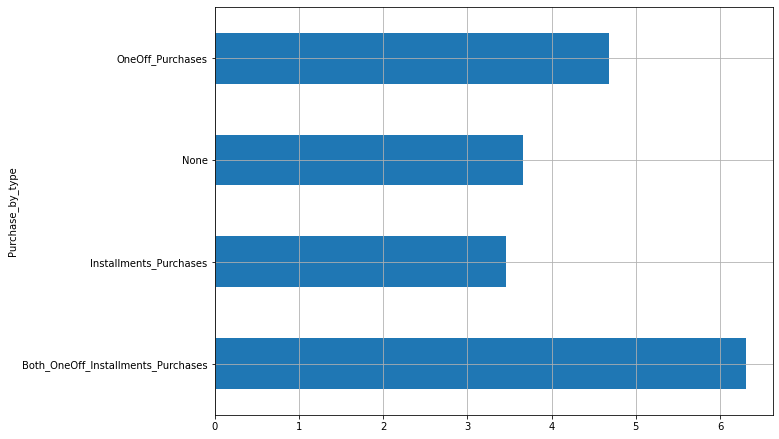

In [30]:
Kpi1.plot.barh()

### Customers with both, One Off Purchases and Installment Purchases are paying dues.

### KPI Two

In [31]:
Kpi2 = credit.groupby('Purchase_by_type').apply(lambda x: np.mean(x['monthly_cash_advance']))

<AxesSubplot:ylabel='Purchase_by_type'>

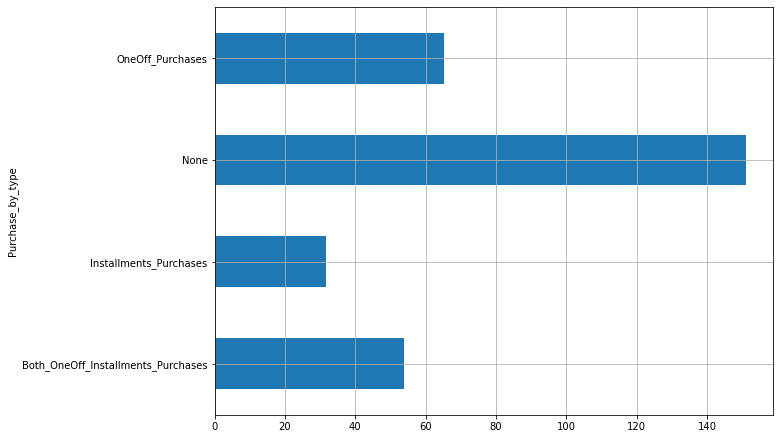

In [32]:
Kpi2.plot.barh()

### Customers who neither take 'OneOff Purchase' nor 'Installment Purchase' take more cash on advance.

### KPI Three

In [33]:
Kpi3 = credit.groupby('Purchase_by_type').apply(lambda x: np.mean(x['limit_usage']))

<AxesSubplot:ylabel='Purchase_by_type'>

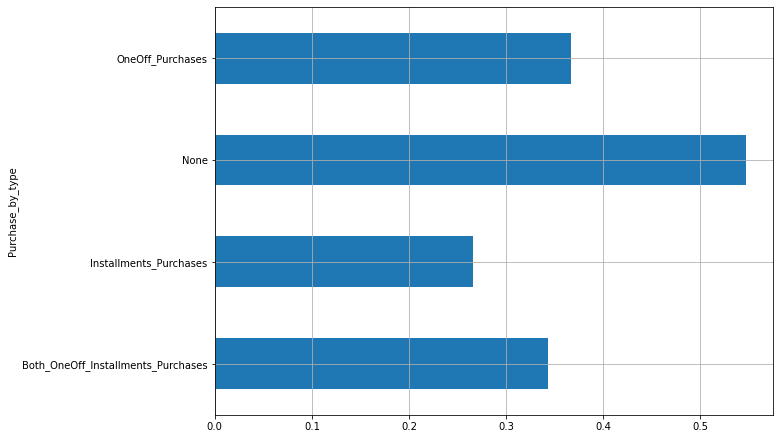

In [34]:
Kpi3.plot.barh()

### Customers with 'Installment purchases' have good credit score

## CREATING DUMMY VARIBALES

In [35]:
# creating dummy variables of 'Purchase_by_type' variable for model building

col_dummies = pd.get_dummies(credit['Purchase_by_type'])
credit = pd.concat([credit, col_dummies], axis = 1)
credit.drop('Purchase_by_type', axis = 1, inplace = True)

In [36]:
credit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,monthly_avg_purchase,monthly_cash_advance,limit_usage,payment_minpay,Both_OneOff_Installments_Purchases,Installments_Purchases,None,OneOff_Purchases
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.000000,12.0,7.950000,0.000000,0.040901,1.446508,0,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,0.222222,12.0,0.000000,387.264093,0.457495,3.826241,0,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,12.0,64.430833,0.000000,0.332687,0.991682,0,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,12.0,124.916667,17.149001,0.222223,0.139867,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000000,12.0,1.333333,0.000000,0.681429,2.771075,0,0,0,1


In [37]:
# Correlation matrix
corrm = credit.corr()
corrm

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,monthly_avg_purchase,monthly_cash_advance,limit_usage,payment_minpay,Both_OneOff_Installments_Purchases,Installments_Purchases,None,OneOff_Purchases
BALANCE,1.000000,0.370254,0.124336,0.138493,0.040367,0.565401,-0.102891,0.070789,-0.089514,0.489843,...,-0.359881,0.075801,0.120453,0.542928,0.584793,-0.266246,0.077499,-0.232155,0.182315,-0.028233
BALANCE_FREQUENCY,0.370254,1.000000,0.192937,0.153188,0.170524,0.116485,0.237081,0.204411,0.184918,0.200011,...,-0.111917,0.133089,0.187263,0.101477,0.450726,-0.180799,0.195141,-0.130401,0.011554,-0.094483
PURCHASES,0.124336,0.192937,1.000000,0.865282,0.710001,-0.137265,0.589131,0.658719,0.461632,-0.187429,...,0.215231,0.121018,0.994678,-0.142289,-0.114365,0.359803,0.575595,-0.164638,-0.407298,-0.058367
ONEOFF_PURCHASES,0.138493,0.153188,0.865282,1.000000,0.319737,-0.092469,0.394927,0.764991,0.168362,-0.121483,...,0.127898,0.087760,0.864091,-0.096278,-0.083113,0.323703,0.501063,-0.348961,-0.326428,0.139761
INSTALLMENTS_PURCHASES,0.040367,0.170524,0.710001,0.319737,1.000000,-0.147078,0.639240,0.251237,0.729578,-0.200741,...,0.238894,0.116144,0.701401,-0.151439,-0.115417,0.232288,0.485354,0.163791,-0.367340,-0.347702
CASH_ADVANCE,0.565401,0.116485,-0.137265,-0.092469,-0.147078,1.000000,-0.286882,-0.122090,-0.238361,0.739399,...,-0.211834,-0.097117,-0.133123,0.985933,0.276838,-0.040302,-0.099008,-0.200088,0.348281,-0.033025
PURCHASES_FREQUENCY,-0.102891,0.237081,0.589131,0.394927,0.639240,-0.286882,1.000000,0.501343,0.862934,-0.333006,...,0.305802,0.069300,0.587375,-0.285854,-0.214400,0.134093,0.515593,0.295918,-0.664037,-0.217147
ONEOFF_PURCHASES_FREQUENCY,0.070789,0.204411,0.658719,0.764991,0.251237,-0.122090,0.501343,1.000000,0.142329,-0.125492,...,0.157531,0.087045,0.655652,-0.123920,-0.099977,0.244952,0.525795,-0.394452,-0.368981,0.204113
PURCHASES_INSTALLMENTS_FREQUENCY,-0.089514,0.184918,0.461632,0.168362,0.729578,-0.238361,0.862934,0.142329,1.000000,-0.282139,...,0.250087,0.079282,0.455849,-0.239219,-0.171555,0.082312,0.463390,0.430024,-0.498338,-0.471909
CASH_ADVANCE_FREQUENCY,0.489843,0.200011,-0.187429,-0.121483,-0.200741,0.739399,-0.333006,-0.125492,-0.282139,1.000000,...,-0.267346,-0.127201,-0.182262,0.733875,0.397236,-0.110402,-0.104190,-0.252571,0.403497,-0.028043


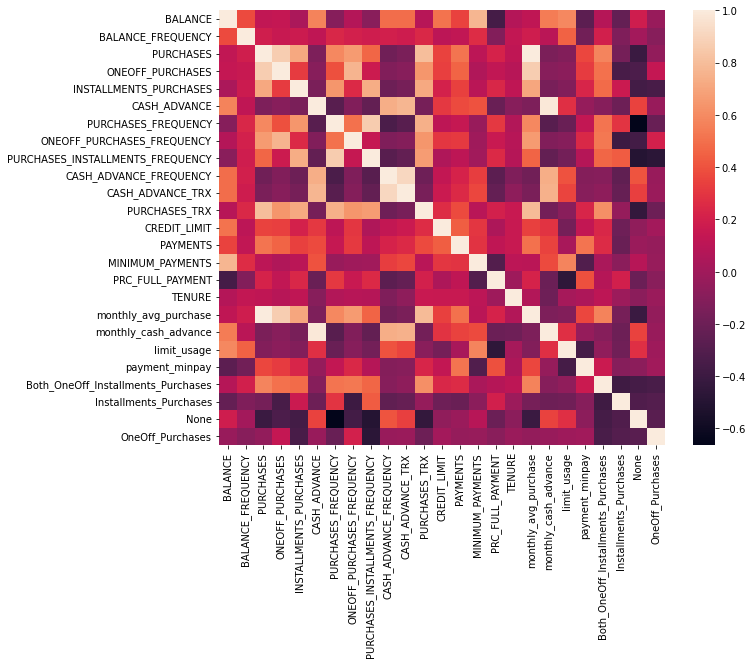

In [38]:
plt.figure(figsize = (10, 8))
sns.heatmap(corrm)
plt.show()# Heat map

In [39]:
credit.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'monthly_avg_purchase', 'monthly_cash_advance', 'limit_usage',
       'payment_minpay', 'Both_OneOff_Installments_Purchases',
       'Installments_Purchases', 'None', 'OneOff_Purchases'],
      dtype='object')

Heat map shows that many features are co-related so applying dimensionality reduction through PCA to get uncorrelated variables

## STANDARDISING THE DATA

In [40]:
# for standardisation | to bring mean --> 0 and Standard Deviation --> 1

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

credit_scaled = sc.fit_transform(credit)

## APPLYING PCA : PRINCIPAL COMPONENT ANALYSIS

In [41]:
credit_scaled.shape

(8950, 25)

In [42]:
# performing Principal component analysis

from sklearn.decomposition import PCA

var_ratio = {}

for n in range(5, 25):
    pc = PCA(n_components = n)
    credit_pca = pc.fit(credit_scaled)
    var_ratio[n] = sum(credit_pca.explained_variance_ratio_)

In [43]:
var_ratio

{5: 0.7194611349400103,
 6: 0.767387648594303,
 7: 0.8041824242410915,
 8: 0.8401367157113547,
 9: 0.8697143430725351,
 10: 0.8911956202162233,
 11: 0.912420021419775,
 12: 0.9302365184075447,
 13: 0.9450716516899182,
 14: 0.9584137056862166,
 15: 0.9684882961141338,
 16: 0.9764767579317015,
 17: 0.9837697256387606,
 18: 0.9892865087844772,
 19: 0.9937852281032759,
 20: 0.9968223142724595,
 21: 0.9985009509548277,
 22: 0.9995219770777451,
 23: 0.9998640376463543,
 24: 1.0}

<AxesSubplot:>

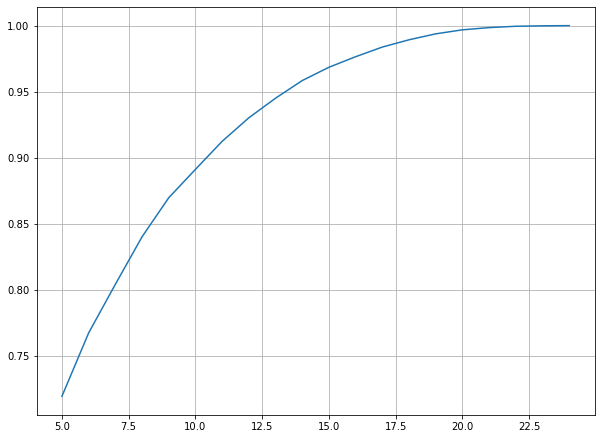

In [44]:
pd.Series(var_ratio).plot()

### Since, 9 components explain 86% of the data. Hence, we will select those 9 components

In [45]:
# Applying n_components as 9 because 9 components explains 86% of the data

pc = PCA(n_components = 9)

credit_pca = pc.fit(credit_scaled)

In [46]:
col_list = credit.columns
col_list

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'monthly_avg_purchase', 'monthly_cash_advance', 'limit_usage',
       'payment_minpay', 'Both_OneOff_Installments_Purchases',
       'Installments_Purchases', 'None', 'OneOff_Purchases'],
      dtype='object')

In [47]:
pd.DataFrame(credit_pca.components_.T, columns = ['PC_' + str(i) for i in range(9)], index = col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8
BALANCE,-0.047401,0.364367,-0.137648,-0.146822,0.195126,-0.127711,-0.121183,0.131707,-0.151047
BALANCE_FREQUENCY,0.053882,0.182520,-0.215134,-0.239843,-0.167596,0.030516,0.361056,-0.325977,-0.500454
PURCHASES,0.328937,0.141695,0.082936,-0.028400,-0.015669,-0.009472,0.081186,0.201252,0.038459
ONEOFF_PURCHASES,0.267718,0.151998,0.259076,-0.143272,-0.018181,0.060773,0.042071,0.126367,-0.014804
INSTALLMENTS_PURCHASES,0.278818,0.061231,-0.225803,0.145063,-0.035860,-0.079109,0.047414,0.164321,0.112873
CASH_ADVANCE,-0.148502,0.333146,0.006418,0.264192,0.086448,0.120122,-0.044327,-0.096185,0.060443
PURCHASES_FREQUENCY,0.306143,-0.022151,-0.234055,0.035735,0.083739,0.227586,0.011815,-0.177936,-0.027459
ONEOFF_PURCHASES_FREQUENCY,0.249454,0.117873,0.246201,-0.194323,-0.034869,0.184056,-0.035288,-0.175905,-0.123494
PURCHASES_INSTALLMENTS_FREQUENCY,0.258223,-0.035837,-0.389788,0.156449,-0.005902,0.081141,-0.026258,-0.069119,0.077332
CASH_ADVANCE_FREQUENCY,-0.170773,0.307674,-0.012959,0.156184,-0.108602,0.212362,0.105515,-0.185786,0.106044


In [48]:
# Factor Analysis : variance explained by each component- 

pd.Series(credit_pca.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(9)])

PC_0    0.285821
PC_1    0.204447
PC_2    0.097649
PC_3    0.080338
PC_4    0.051206
PC_5    0.047927
PC_6    0.036795
PC_7    0.035954
PC_8    0.029578
dtype: float64

In [49]:
reduced_credit = credit_pca.fit_transform(credit_scaled)

In [50]:
df = pd.DataFrame(reduced_credit)

In [51]:
df.shape

(8950, 9)

In [52]:
df.head()

,0,1,2,3,4,5,6,7,8
0,-1.313513,-2.838654,-0.542384,0.025271,0.431845,-0.290161,0.009592,-0.060714,0.512048
1,-3.174895,3.083190,0.553046,1.884479,0.187042,-1.296893,-0.206179,-0.000581,-0.691924
2,0.860594,-0.093187,1.535339,-2.641136,1.580647,0.637442,-0.352814,-0.978632,-1.015168
3,-0.395109,-0.465372,2.128858,-1.636651,1.672139,-0.105706,-0.856430,0.607511,0.352037
4,-1.756117,-1.559736,0.908750,-2.131489,0.431851,0.068185,1.097879,-0.365258,0.286719


## CLUSTERING

In [53]:
# Improting required libraries for clustering
from sklearn.cluster import KMeans

In [54]:
wcss = [] # Within the cluster some of scatter

for i in range(2, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

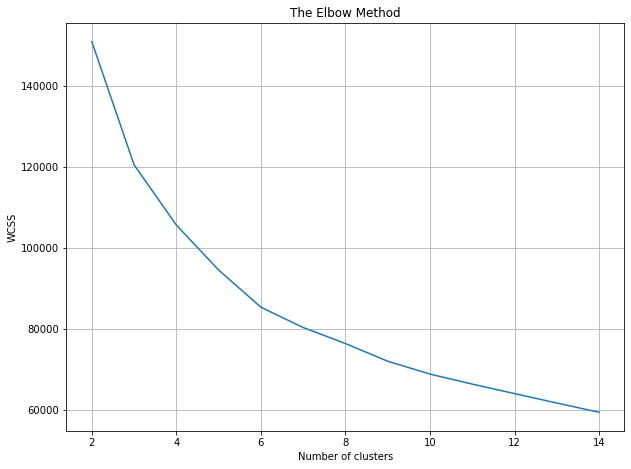

In [55]:
# Plotting elbow curve

plt.plot(range(2, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### SIX Clusters explains the most of the data.

In [56]:
# creating 6 clusters

kmeans = KMeans(n_clusters = 6).fit(df)
kmeans.labels_

array([1, 0, 4, ..., 1, 2, 4])

In [57]:
# value counts

values = pd.Series(kmeans.labels_).value_counts()
values = values.sort_index()
values

0    1126
1    2074
2    1617
3    1024
4    1526
5    1583
dtype: int64

## CLUSTERS VISUALISATION

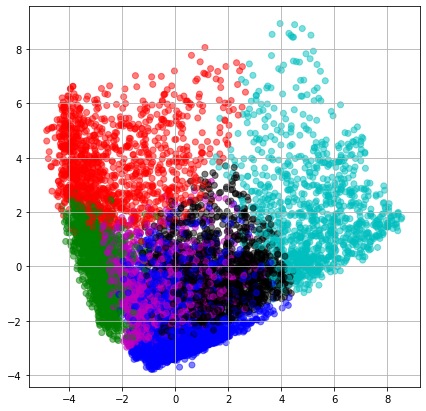

In [58]:
color_map = {0:'r', 1:'b', 2:'g', 3:'c', 4:'m', 5:'k'}

label_color = [color_map[l] for l in kmeans.labels_]

plt.figure(figsize = (7, 7))

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c = label_color, cmap = 'Spectral',alpha = 0.5)

In [59]:
credit.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'monthly_avg_purchase', 'monthly_cash_advance', 'limit_usage',
       'payment_minpay', 'Both_OneOff_Installments_Purchases',
       'Installments_Purchases', 'None', 'OneOff_Purchases'],
      dtype='object')

In [60]:
# Key performace variable selection . Here I am dropping varibales which are used in derving new KPI

col_kpi = ['PURCHASES_TRX', 'monthly_avg_purchase', 'monthly_cash_advance', 'limit_usage', 'CASH_ADVANCE_TRX',
           'payment_minpay', 'Both_OneOff_Installments_Purchases', 'Installments_Purchases', 'OneOff_Purchases',
           'None', 'CREDIT_LIMIT']

In [61]:
cluster_df_6 = pd.concat([credit[col_kpi], pd.Series(kmeans.labels_, name = 'Cluster_6')], axis=1)

In [62]:
cluster_df_6.head()

,PURCHASES_TRX,monthly_avg_purchase,monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,Both_OneOff_Installments_Purchases,Installments_Purchases,OneOff_Purchases,None,CREDIT_LIMIT,Cluster_6
0,2.0,7.950000,0.000000,0.040901,0.0,1.446508,0,1,0,0,1000.0,1
1,0.0,0.000000,387.264093,0.457495,4.0,3.826241,0,0,0,1,7000.0,0
2,12.0,64.430833,0.000000,0.332687,0.0,0.991682,0,0,1,0,7500.0,4
3,1.0,124.916667,17.149001,0.222223,1.0,0.139867,0,0,1,0,7500.0,4
4,1.0,1.333333,0.000000,0.681429,0.0,2.771075,0,0,1,0,1200.0,4


In [63]:
six_cluster = cluster_df_6.groupby('Cluster_6')\
.apply(lambda x: x[col_kpi].mean()).T
six_cluster

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,6.426288,11.348602,0.076067,42.913086,5.821756,18.824384
monthly_avg_purchase,35.704378,42.215897,0.288267,281.506440,51.091495,86.488867
monthly_cash_advance,320.077534,11.478005,95.512734,44.397870,23.689597,19.784004
limit_usage,0.587508,0.234099,0.541635,0.300465,0.332479,0.327457
CASH_ADVANCE_TRX,10.275311,0.442141,4.076685,1.673828,1.201180,1.151611
payment_minpay,3.038424,3.470646,3.767951,11.055463,4.368748,4.338720
Both_OneOff_Installments_Purchases,0.215808,0.002893,0.008658,0.903320,0.001966,1.000000
Installments_Purchases,0.127886,0.997107,0.016698,0.020508,0.000000,0.000000
OneOff_Purchases,0.241563,0.000000,0.000618,0.076172,0.998034,0.000000
None,0.414742,0.000000,0.974026,0.000000,0.000000,0.000000


## Checking performance metrics for Kmeans with Silhouette score

In [64]:
# Importing required libraries to check performance matrix
from sklearn.metrics import silhouette_score

In [65]:
score = {}

for n in range(2,15):
    km_score = KMeans(n_clusters = n)
    km_score.fit(df)
    score[n] = silhouette_score(df, km_score.labels_)

<AxesSubplot:>

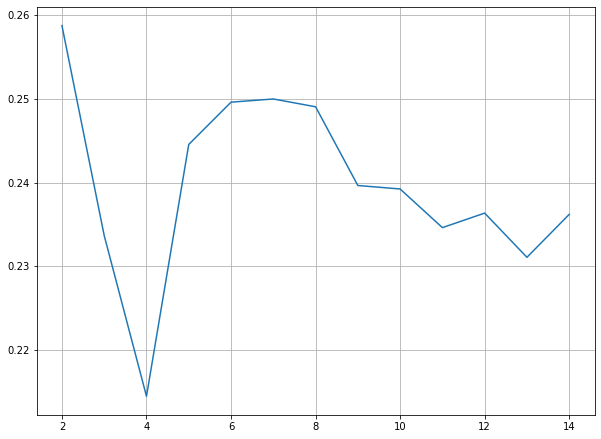

In [66]:
pd.Series(score).plot()

## Performance metrics also suggest that K-means with 6 cluster is able to show distinguished characteristics of each cluster.

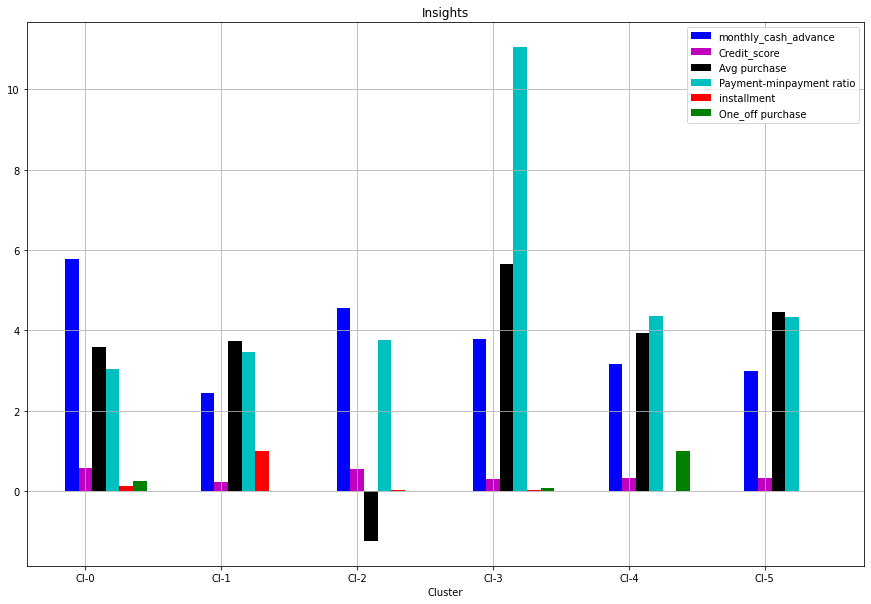

In [67]:
# Plotting all the clusters with some important varibales 

fig,ax = plt.subplots(figsize = (15, 10))
index = np.arange(len(six_cluster.columns))

cash_advance = np.log(six_cluster.loc['monthly_cash_advance',:].values)
credit_score = (six_cluster.loc['limit_usage',:].values)
purchase = np.log(six_cluster.loc['monthly_avg_purchase',:].values)
payment = six_cluster.loc['payment_minpay',:].values
installment = six_cluster.loc['Installments_Purchases',:].values
one_off = six_cluster.loc['OneOff_Purchases',:].values

bar_width = .10
b1 = plt.bar(index,cash_advance, color = 'b', label = 'monthly_cash_advance', width = bar_width)
b2 = plt.bar(index + bar_width, credit_score, color = 'm', label = 'Credit_score', width = bar_width)
b3 = plt.bar(index + 2 * bar_width, purchase, color = 'k', label = 'Avg purchase', width = bar_width)
b4 = plt.bar(index + 3 * bar_width, payment, color = 'c', label = 'Payment-minpayment ratio', width = bar_width)
b5 = plt.bar(index + 4 * bar_width, installment, color = 'r', label = 'installment', width = bar_width)
b6 = plt.bar(index + 5 * bar_width, one_off, color = 'g', label = 'One_off purchase', width = bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))

plt.legend()

In [68]:
# Percentage of every cluster in the data

for i in range(0, 6):
    x = ((values[i]*100)/values.sum()).round()
    print(i, 'group is about', x, '% of the customer database')

0 group is about 13.0 % of the customer database
1 group is about 23.0 % of the customer database
2 group is about 18.0 % of the customer database
3 group is about 11.0 % of the customer database
4 group is about 17.0 % of the customer database
5 group is about 18.0 % of the customer database


## Insights with the 6 Clusters

1. Cluster 0 customers are taking highest monthly cash advance and have maximum credit score. This group is about 13% of the total customer base.

2. Cluster 1 customers are taking low monthly advance_cash but have good monthly average purchase and are paying dues on time. This group is about 23% of the total customer base.

3. Cluster 2 customers stands out from the rest because they are taking low monthly advance_cash but have good monthly average purchase and are paying dues very much on time. This group is about 18% of the total customer base.

4. Cluster 3 customers are buying mostly one-off purchase with a good payment to minimum payment ratio. This group is about 11% of the total customer base.

5. Cluster 4 customers are with high monthly average purchase. This group is about 17% of the total customer base.

6. Cluster 5 customers are taking maximum monthly advance_cash but with no monthly average purchase. This group is about 18% of the total customer base